<a href="https://colab.research.google.com/github/MiltonGallardo/MiltonGallardo/blob/main/Ejercicio_RNC_Python1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tarea**: El conjunto de datos de moda MNIST es otro conjunto popular para la evaluación de modelos de visión computarizada. Consiste de 60,000 imágenes de entrenamiento, cada una es una imagen en escala de grises de 28x28, proveniente de 1 de 10 clases:

0 Polera/top
1 Pantalón
2 Suéter
3 Vestido
4 Abrigo
5 Sandalia
6 Camisa
7 Zapatilla
8 Bolso
9 Botín
Tu tarea es usar una RNC para clasificar las imágenes como uno de los 10 artículos de vestimenta. Puedes descargar los datos desde Kaggle. Trata de construir el mejor modelo posible (que tenga la mayor precisión en los datos de prueba).

In [3]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
import tensorflow_datasets as tfds

In [4]:
# Obtener datos: ya está dividido en conjuntos de entrenamiento y prueba
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
#Queremos escalar los datos entre 0 y 1, Esta es  una opción recurrente porque mejora la velocidad. 
#Ya que los pixeles son valores numéricos entre 0 y 225, podemos dividir por el valor máximo para lograrlo. 
# Escalar datos entre 0 y 1
X_train = X_train / 255
X_test = X_test / 255


In [7]:
# Reformar datos
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


In [8]:
#Formato objetiov
y_train = to_categorical(y_train, num_classes = 10)
y_test = to_categorical(y_test, num_classes = 10)

In [9]:
#¡Ahora podemos construir la RNC!
# Paso 1: Definir nuestra estructura de red
# Guardar la forma de entrada
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [10]:
# Modelo secuencial
model = Sequential()

In [11]:
#Ahora podemos agregar nuestras capas ocultas! Usaremos una capa convolucional, seguida de una capa de pooling, una capa de Flatten y, finalmente, una capa de salida densa.Ya que estamos haciendo clasificación multiclase, usaremos la función de activación softmax en la capa de salida.
# Capa convolucional
model.add(Conv2D(filters = 8, # Cuantos filtros quieres usar
                 kernel_size = 3, # tamaño de cada filtro
                 input_shape = input_shape)) # ¿Cuál es la forma de tus características de entrada (definimos esto arriba)
# Pooling layer
model.add(MaxPooling2D(pool_size = 2)) # Tamaño de pooling
# Capa de aplanamiento
model.add(Flatten())
# Capa de salida
model.add(Dense(10, # Cuantas posibilidades de salida tenemos
                activation = 'softmax')) # ¿Qué función de activación estás usando?

In [12]:
# Paso 2: compilar
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])

In [13]:
# Paso 3: ajustar nuestro modelo
history = model.fit(X_train, y_train,
                    validation_data = (X_test, y_test), 
                    epochs=20)

Epoch 1/20
1875/1875 [==============================] - 24s 12ms/step - loss: 0.5354 - acc: 0.8134 - val_loss: 0.4395 - val_acc: 0.8456
Epoch 2/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.4075 - acc: 0.8587 - val_loss: 0.4075 - val_acc: 0.8583
Epoch 3/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3701 - acc: 0.8706 - val_loss: 0.3914 - val_acc: 0.8610
Epoch 4/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3465 - acc: 0.8790 - val_loss: 0.3643 - val_acc: 0.8704
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3288 - acc: 0.8857 - val_loss: 0.3568 - val_acc: 0.8732
Epoch 6/20
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3140 - acc: 0.8899 - val_loss: 0.3493 - val_acc: 0.8760
Epoch 7/20
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3042 - acc: 0.8929 - val_loss: 0.3398 - val_acc: 0.8797
Epoch 8/20
1875/1875 [==========================

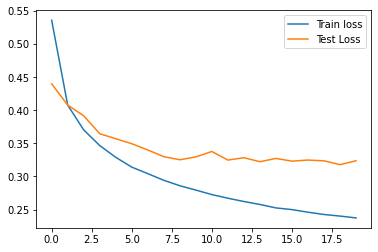

In [14]:
# Visualizar la pérdida
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

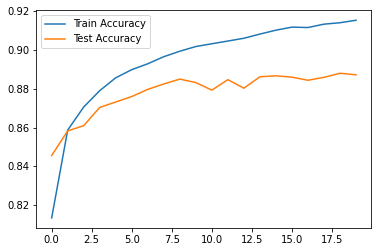

In [15]:
# Visualizar la precisión
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();